<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.4 Modelos en tiempo discreto </h3>
<h3 style="text-align: center;"> Ejercicios</h3>

### Ejercicio 1

Simular el proceso de incremento de un capital inicial $K_0$ sometido a un tipo de interés en los siguientes supuestos:

**a)** Suponer un tipo de interés simple y anual $i_a$, esto es, el interés se aplica una vez y se acumula al capital al final de cada año. Escribir la ecuación en diferencias que modela el proceso de acumulación de capital y resolverla analísticamente y por medio de simulaciones.

**b)** Suponer ahora que se aplica un tipo de interés diario $i_d$ al capital. Encontrar el tipo de interés diario con el cual se obtiene el mismo interés en un año que aplicando el tipo de interés anual anterior. Hallar la relación entre ambos tipos de interés (anual y diario) analítica y numéricamente.

**c)** Suponer que se toma el tiempo de forma continua, donde cada unidad de tiempo es un año. Encontrar la relación entre el tipo de interés anual simple $i_a$ (discreto) y compuesto $i_c$ (tiempo continuo), tanto analítica como numéricamente. 

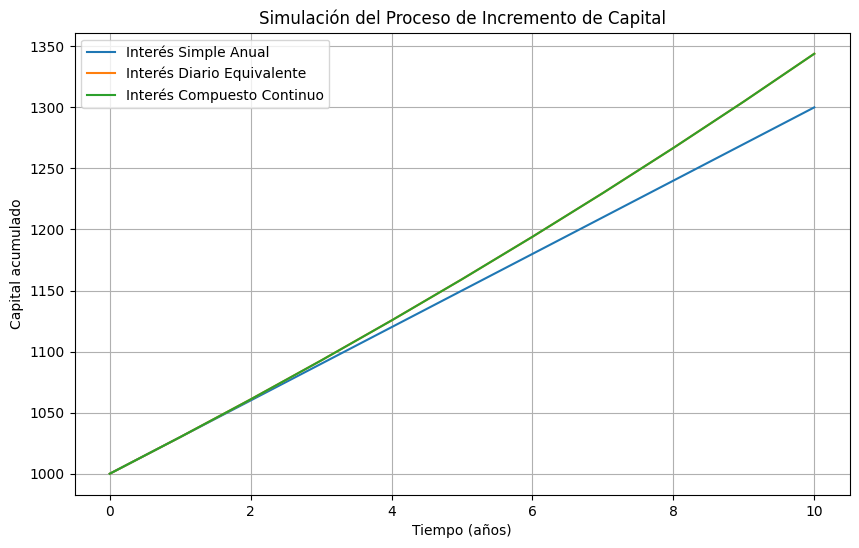

(1300.0,
 1343.9163793444038,
 1343.9163793441223,
 8.098629905317623e-05,
 0.02955880224154443)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
K0 = 1000  # Capital inicial en unidades monetarias
ia = 0.03  # Tipo de interés anual simple
periodos = 10  # Número de años a simular

# (a) - Interés simple anual
def interes_simple_anual(K0, ia, periodos):
    K = [K0]
    for t in range(1, periodos + 1):
        K.append(K0 * (1 + ia * t))
    return K

K_simple = interes_simple_anual(K0, ia, periodos)

# (b) - Interés diario equivalente al anual
id_diario = (1 + ia) ** (1 / 365) - 1  # Cálculo del interés diario equivalente
def interes(K0, id_diario, periodos):
    dias_totales = periodos * 365
    K = [K0]
    for t in range(1, dias_totales + 1):
        K.append(K[-1] * (1 + id_diario))
    # Extraer solo valores anuales para comparación
    return [K[i * 365] for i in range(periodos + 1)]

K_diario = interes(K0, id_diario, periodos)

# Inciso (c) - Interés compuesto continuo
def interes_continuo(K0, ic, periodos):
    K = [K0 * np.exp(ic * t) for t in range(periodos + 1)]
    return K

ic_continuo = np.log(1 + ia)  # Cálculo del interés compuesto continuo equivalente
K_continuo = interes_continuo(K0, ic_continuo, periodos)

# Graficar los resultados para cada caso
plt.figure(figsize=(10, 6))
plt.plot(range(periodos + 1), K_simple, label="Interés Simple Anual")
plt.plot(range(periodos + 1), K_diario, label="Interés Diario Equivalente")
plt.plot(range(periodos + 1), K_continuo, label="Interés Compuesto Continuo")
plt.xlabel("Tiempo (años)")
plt.ylabel("Capital acumulado")
plt.title("Simulación del Proceso de Incremento de Capital")
plt.legend()
plt.grid(True)
plt.show()

# Resultados de los valores finales para cada caso
K_simple[-1], K_diario[-1], K_continuo[-1], id_diario, ic_continuo


## Ejercicio 2

Este ejercicio presenta un modelo económico clásico en tiempo discreto, llamado **modelo de la telaraña**. Se asume un mercado de un cierto producto (e.g., productos agrícolas, como soja, arroz, café,...), cuyos precios se fijan periodo a periodo (años) por la ley de la oferta y demanda. Las suposiciones son las siguientes: 

- Supóngase $D(p_t)$ el producto demandado en el año $t$, que depende del precio $p_t$ del producto en ese año. Se asume una demanda lineal, por tanto, $D(p_t) = a -bp_t$, donde $a$ y $b$ son parámetros.
- Los productores toman decisiones de producción a partir de los precios de años anteriores. Por simplicidad, se asume que la oferta de ese producto en el año $t$ depende exclusivamente del precio del producto en el año anterior. Por tanto $S=S(p_{t-1})$.
- Se asume un mercado en competencia perfecta, por lo que el precio del producto en cada año se obtiene como resultado de igualarse las funciones de oferta y demanda, esto es $D(p_t)=S(p_{t-1})$. Despejando $p_t$ de esta ecuación se llega a:
  $$ p_t= \frac{a}{b} - \frac{S(p_{t-1})}{b}. $$

**a)** Asumir una función de oferta lineal creciente y estudiar la evolución de los precios del producto a largo plazo en función de los valores de los parámetros y un precio inicial del producto $p_0$. 

**b)** Supóngase ahora que la oferta anual se fija a partir de un precio esperado $p_t^e$. Las expectativas de precios se fijan a partir del precio y las expectativas de precios del año anterior de la forma:
  $$ p_t^e= (1-\alpha) p_{t-1} + \alpha p_{t-1}^e, $$
con $0 \leq \alpha \leq 1$ un parámetro que determina el peso de las expectivas de precios del año anterior en la expectivas de precios del año en curso. Realizar el mismo estudio del epígrafe anterior para esta nueva forma de fijación de la oferta, asumiendo el mismo precio inicial $p_0$ anterior y $p_1$ el dado por el epígrafe anterior. 


#### Apartado a)

$a$ = Es el intercepto de la función de demanda, D(pt)=a−b⋅pt. Representa la cantidad máxima que se demandaría si el precio fuera cero. Cuanto mayor sea el valor de a, mayor será la cantidad demandada cuando el precio es bajo. En términos prácticos, refleja el "tamaño" de la demanda potencial del mercado.

$b$ = Es el coeficiente que multiplica al precio en la función de demanda y, por lo tanto, representa la pendiente de la curva de demanda. Este parámetro indica cómo responde la cantidad demandada a cambios en el precio. Si b es grande, significa que una pequeña variación en el precio provoca un cambio significativo en la demanda, es decir, que la demanda es muy sensible al precio (alta elasticidad). En cambio, si 
b es pequeño, la demanda es menos sensible al precio.

$c$ = Es el intercepto de la función de oferta, S(pt−1)=c+d⋅pt−1. Representa la cantidad de producto que se ofrecería si el precio fuera cero. En este contexto, refleja el nivel de oferta mínimo o la oferta "base" en el mercado, independientemente del precio.

$d$ =  Es el coeficiente que multiplica al precio en la función de oferta, y representa la pendiente de la curva de oferta. Este parámetro indica cómo varía la cantidad ofrecida en función del precio del año anterior. Si d es positivo, la oferta aumenta con el precio; cuanto mayor sea d, mayor será el aumento de la oferta en respuesta a un incremento en el precio, indicando una mayor sensibilidad de la oferta al precio. Si d fuera negativo, la oferta disminuiría al aumentar el precio, aunque esto es menos común en modelos económicos básicos.

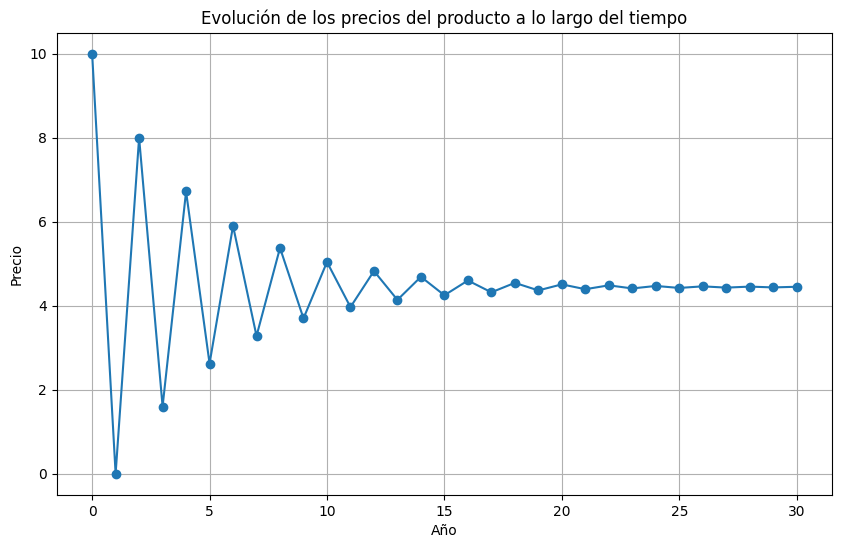

In [31]:
import matplotlib.pyplot as plt

# Definición de parámetros
a = 10      # Intercepto de la demanda (demanda máxima cuando el precio es cero).
b = 1       # Pendiente de la demanda (sensibilidad de la demanda al precio).
c = 2       # Intercepto de la oferta (cantidad ofrecida cuando el precio es cero).
d = 0.8     # Pendiente de la oferta (sensibilidad de la oferta al precio del año anterior). 

# Precio inicial
p0 = 10

# Función para calcular el precio en el año t en función del precio en el año t-1
def calcular_precio(pt_1, a, b, c, d):
    return (a - c) / b - (d / b) * pt_1

# Número de años a simular
n_years = 30
precios = [p0]

# Cálculo de la evolución de los precios
for i in range(n_years):
    pt = calcular_precio(precios[-1], a, b, c, d)
    precios.append(pt)

# Visualización de la evolución de los precios
plt.figure(figsize=(10, 6))
plt.plot(range(n_years + 1), precios, marker='o')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Evolución de los precios del producto a lo largo del tiempo')
plt.grid()
plt.show()


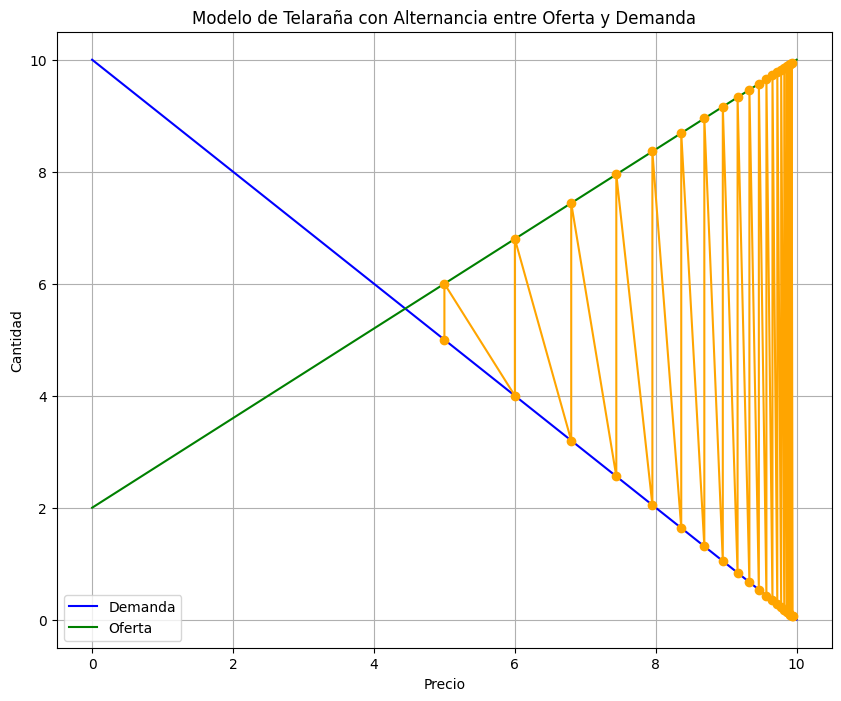

In [36]:
# Parámetros para la simulación del modelo de telaraña
a = 10  # Intercepto de la demanda
b = 1   # Coeficiente de la demanda (pendiente)
c = 2   # Intercepto de la oferta
d = 0.8 # Coeficiente de la oferta (pendiente)
p0 = 5  # Precio inicial

# Número de iteraciones para el modelo de telaraña
n_iter = 20

# Definición del precio de equilibrio y la función para calcular demanda y oferta
precio_equilibrio = (a - c) / (b + d)

# Rango de precios para graficar las rectas de oferta y demanda
p_values = np.linspace(0, 10, 100)
demanda_values = a - b * p_values
oferta_values = c + d * p_values

# Inicializar listas para puntos del modelo de telaraña (alternando oferta y demanda)
telaraña_precios = [p0]
telaraña_demanda = [a - b * p0]

# Generar puntos del modelo de telaraña (alternando entre oferta y demanda)
for _ in range(n_iter):
    # Calcular el siguiente precio según la oferta basada en el precio actual
    oferta_punto = c + d * telaraña_precios[-1]
    telaraña_precios.append(telaraña_precios[-1])  # Punto en la demanda
    telaraña_demanda.append(oferta_punto)  # Punto en la oferta

    # Calcular el siguiente precio según la demanda basada en el precio en oferta
    demanda_punto = a - b * oferta_punto
    telaraña_precios.append(oferta_punto)  # Punto en la oferta
    telaraña_demanda.append(demanda_punto)  # Punto en la demanda

# Graficar el modelo de telaraña
plt.figure(figsize=(10, 8))
plt.plot(p_values, demanda_values, label="Demanda", color="blue")
plt.plot(p_values, oferta_values, label="Oferta", color="green")
plt.plot(telaraña_precios, telaraña_demanda, color="orange", marker="o", linestyle="-")
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.title("Modelo de Telaraña con Alternancia entre Oferta y Demanda")
plt.legend()
plt.grid()
plt.show()


## Ejercicio 3

El **modelo de Leslie** representa la evolución de una población animal a partir de la población y distribución de las hembras por edades en cada instante de tiempo. Por simplicidad, presentamos el caso de tres grupos de edad. Las suposiciones del modelo son las siguientes: 

- Cada hembra perteneciente al grupo $i$ tiene exactamente $b_i \geq 0$ descendientes hembras en cada periodo de tiempo, con $i=\{1,2,3\}$.
- También en cada periodo de tiempo sobrevive un porcentaje $0 \leq c_i \leq 1$ de hembras pertenecientes el grupo $i$, que pasan al siguiente grupo, con $i=\{1,2,3\}$. Se toma $c_3=0$.
- La matriz
$$L=\left[ \begin{array}{lll} b_1 & b_2 & b_3 \\ c_1 &  0 &  0\\ 0 & c_2 & 0 \end{array}\right]$$
representa la matriz de reproducibilidad de las hembras en la población y se denomina **matriz de Leslie**. Entonces, dada una población de hembras en el tiempo $t$ de $x_t=[x_t^1,x_t^2,x_t^3]$, la población de hembras en el periodo siguiente sigue la ecuación:
$$x_{t+1}= Lx_t$$


**a)** Asúmase una población de insectos con la siguiente matriz de Leslie:
$$L=\left[ \begin{array}{lll} 0 & 3 & 1 \\ 0.3 &  0 &  0\\ 0 & 0.5 & 0 \end{array}\right].$$
Dada una población inicial de hembras de $x_0=[1000,2000,3000]$, calcular la población y distribución (porcentaje) por edades de hembras a medio plazo $t \simeq 20$ y a largo plazo $t \simeq 50$. ¿Tiende a extinguirse la población? Cambiar la población inicial de hembras y observar si la población tenderá a extinguirse o no para alguno de los valores y la distribución final de hembras.

**b)** Repítase el mismo ejercicio anterior con la siguiente matriz de reproducibilidad de las hembras:
$$L=\left[ \begin{array}{lll} 0 & 3 & 1 \\ 0.2 &  0 &  0\\ 0 & 0.5 & 0 \end{array}\right].$$
De nuevo estudiar si la población tiende a extinguirse para distingos valores de población inicial de hembras.

**c)** En las condiciones del apartado a) se lleva a cabo un programa de control de la población de insectos a través de una reducción simultánea de hembras a una tasa $0 \leq d \leq 1$ dada, homogénea para todos los grupos de edad. Encontrar la tasa $d$ con la que la población de insectos permanece estable a largo plazo.  